# Processing Data for Reproducible Analytics

## Explore the Data 

Begin by importing the required **Python** libraries and loading the **TZA_CCT_baseline.csv** dataset into Python. Following this, conduct a thorough inspection of the dataset to understand its structure and key characteristics. This inspection will be crucial for identifying the **Unit of Observation**, the **Unique ID**, the **Data Types**, and for gaining a rapid understanding of any potential **missing values** within the data.

In [1]:
## Import Libraries, Load in Data, and Initiate Data Exploration ##

# Pandas and Numpy for Data Manipulation, Analysis, and Numerical Calculations 
import pandas as pd
import numpy as np

# Matplotlib and Seaborn for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set Visualisation Theme
sns.set_theme()

# Load in the Data 
baseline = pd.read_csv('Data/Raw/TZA_CCT_baseline.csv')

# Set the display option so that output display a maximum of 100 columns ##
pd.set_option('display.max_columns', 100)

# Switch off warnings
import warnings
warnings.filterwarnings(action = 'ignore')

# Display the structure of the dataset
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vid               1760 non-null   int64  
 1   hhid              1760 non-null   int64  
 2   enid              1760 non-null   int64  
 3   floor             1760 non-null   int64  
 4   roof              1760 non-null   int64  
 5   walls             1760 non-null   int64  
 6   water             1760 non-null   int64  
 7   enegry            1760 non-null   int64  
 8   rel_head          1760 non-null   int64  
 9   female_head       1760 non-null   int64  
 10  hh_size           1760 non-null   int64  
 11  n_child_5         1760 non-null   int64  
 12  n_child_17        1760 non-null   int64  
 13  n_adult           1760 non-null   int64  
 14  n_elder           1760 non-null   int64  
 15  read              1759 non-null   float64
 16  sick              1760 non-null   int64  


Analysis of the output reveals **1760** observations and **36** variables within the dataset. The data types include **27** integer (int64) columns, **4** string (object) columns, and **5** floating-point columns. The presence of missing values is evident in columns with fewer **non-null** entries. 

Examining the first **3** rows of the dataset will assist in determining the **unit of observation** and the **unique ID**.

In [2]:
# Display the first five rows of the dataset
print(baseline.head(3))

   vid  hhid  enid  floor  roof  walls  water  enegry  rel_head  female_head  \
0    1  9122   818      1     2      1      1       1         4            0   
1    1  9111   420      1     2      1      4       1         4            1   
2    1  9120   805      1     2      1      7       1         4            0   

   hh_size  n_child_5  n_child_17  n_adult  n_elder  read  sick  food_cons  \
0        4          0           1        1        2   0.0     1   595400.0   
1       10          1           3        3        3   0.0     0  1955200.0   
2        2          0           0        1        1   1.0     0   183820.0   

   nonfood_cons  farm   ar_farm ar_farm_unit  crop     crop_other  crop_prp  \
0         13600     1  0.500000         Acre  77.0            NaN       NaN   
1         69926     1  1.214083      Hectare  99.0  Coconut trees       2.0   
2          7500     1  0.250000         Acre  99.0         sesame       1.0   

   livestock_now  livestock_before  drought_flood

Analyzing the dataset's nature and structure, the **unit of observation** appears to be the **Household**. The variables consistently describe household characteristics, and each observation clearly corresponds to a single household. There is no evidence suggesting multiple units of observation.

Unique ID = **hhid**

## Identify and Fix Duplicates

In [3]:
# Identify duplicate by "hhid" column
duplicates = baseline['hhid'].duplicated().sum()

# Display the number of duplicates in the dataset
print(f"The Dataset has {duplicates} duplicates.")

The Dataset has 2 duplicates.


In [4]:
# Drop Duplicates -- the code will drop duplicates 
baseline.drop_duplicates(subset = ['hhid'], ignore_index = True, inplace = True)

# Check if indeed duplicates have been deleted 
new_duplicates = baseline['hhid'].duplicated().sum()
print(f"The new number of duplicated observation is: {new_duplicates}.")

The new number of duplicated observation is: 0.


## Clean the Data  

### Replace numeric values representing missing data (-88) with missings.

To address the presence of **-88** as a missing value indicator, these values will be replaced with **NaN**, the standard Python representation for missing data. Before applying the replacement, we will display the first five rows of a representative column containing **-88** to serve as a baseline for verification.

In [5]:
# Display the first five rows of "assoc" column
print(baseline['assoc'].head())

0     1
1   -88
2     0
3     0
4     0
Name: assoc, dtype: int64


In [6]:
# Replace numeric values representing missing data (-88) with NaN values.
baseline.replace(-88, np.nan, inplace = True)

# Display the "assoc" column again to check if the changes made are successful
print(baseline['assoc'].head())

0    1.0
1    NaN
2    0.0
3    0.0
4    0.0
Name: assoc, dtype: float64


The **-88** values have successfully been replaced with **NaN** as indicated in the `assoc` column snipet above. 

### Extend the values in `crop` column by adding the two most used categories from `crop_other`.

Before anything else, It is import to create a **Frequency Table** for `crop_other` column to check its **unique** values and their corresponding frequencies. 

In [7]:
# Creating frequency distribution table for crop_other" column
crop_other_freq = baseline['crop_other'].value_counts(dropna = False)

# Display the unique values
print(f"The unique values for crop_other are:\n {crop_other_freq}")

The unique values for crop_other are:
 crop_other
NaN               1659
sesame              31
Sesame              25
Sesame.             24
Coconut             15
Coconut.             2
Coconut trees        1
Coconut trees.       1
Name: count, dtype: int64


As evidenced by the table, this column exhibits inconsistent data entries. It contains a mix of intended missing value indicators, specific entries like **Seseme** and **Coconut**, and numerous typographical errors. Therefore, it is essential to clean this column before proceeding with any data extensions or modifications.

In [8]:
# Map old values to new values - Cleaning "crop_other" column
map = {'sesame': 'Sesame', 'Sesame.': 'Sesame', 'Sesame': 'Sesame', 'Coconut.':\
       'Coconut', 'Coconut trees': 'Coconut', 'Coconut trees.': 'Coconut', 'Coconut': 'Coconut'}

# Map Inconsistent values to correct values
baseline['crop_other'] = baseline['crop_other'].map(map)

# Display the new frequency table to check if the column has been cleaned
crop_other_freq = baseline['crop_other'].value_counts(dropna = False)
print(f"The new frequency table for crop_other is:\n {crop_other_freq}")

The new frequency table for crop_other is:
 crop_other
NaN        1659
Sesame       80
Coconut      19
Name: count, dtype: int64


The `crop_other` column is now cleaned and ready for further analysis. The next step is to augment the `crop` column by incorporating the two most common entries from `crop_other`. To better understand the interplay between these columns, the following is a table snippet that specifically highlights instances where `crop_other` contains **Sesame** or **Coconut**.

In [9]:
df_crop = baseline[baseline['crop_other'].isin(['Sesame', 'Coconut'])][['crop', 'crop_other']]
print(df_crop.sample(10, random_state = 45))

      crop crop_other
1     99.0    Coconut
2     99.0     Sesame
1095  99.0     Sesame
1261  99.0     Sesame
666   99.0     Sesame
1749  99.0    Coconut
1266  99.0     Sesame
668   99.0     Sesame
66    99.0     Sesame
1401  99.0    Coconut


Given that the `crop` column is intended as a numerical representation of the categorical values in `crop_other`, it's crucial that each unique category in `crop_other` has a unique numerical code in `crop`. To integrate 'Sesame' and 'Coconut' from crop_other into crop, it makes sense to assign them two previously unused numerical codes.

In [10]:
### Extend the values in crop column by adding the two most used categories from crop_other
baseline['crop'] = baseline['crop'].mask(baseline['crop_other'] == 'Sesame', 40)
baseline['crop'] = baseline['crop'].mask(baseline['crop_other'] == 'Coconut', 41)

# Verify if the values have indeed been changed
df_crop = baseline[baseline['crop_other'].isin(['Sesame', 'Coconut'])][['crop', 'crop_other']]
print(df_crop.sample(10, random_state = 45))

      crop crop_other
1     41.0    Coconut
2     40.0     Sesame
1095  40.0     Sesame
1261  40.0     Sesame
666   40.0     Sesame
1749  41.0    Coconut
1266  40.0     Sesame
668   40.0     Sesame
66    40.0     Sesame
1401  41.0    Coconut


In [11]:
# Display unique values for crop column to verify if "99" is realy gone
crop_unique = baseline['crop'].unique()

# Display the unique values
print(f"\nThe Unique values for 'crop' column are:\n {crop_unique}")


The Unique values for 'crop' column are:
 [77. 41. 40.  6.  4.  9.  5. 34.  1. 15. nan 11. 32. 39.  3.  8. 21. 20.
 24. 18. 10. 17. 31.  2. 13.]


`crop` column and `crop_other` columns have successfully been cleaned.

### Check and document if there are numeric variable that have outliers

The following activities will check for otliers in **Consumption** and **Area variables**.

**Consumption Varaibles**: `food_cons` and `nonfood_cons`

**Area Variables**: `ar_farm`

The first step is to generate the summary statistics for the three columns.

In [12]:
df_stats = baseline[['food_cons', 'nonfood_cons', 'ar_farm']].describe()
print(f"\nSummary Statistics for 'Consumption' and 'Area' variables: \n\n {df_stats}")


Summary Statistics for 'Consumption' and 'Area' variables: 

           food_cons  nonfood_cons      ar_farm
count  1.758000e+03  1.758000e+03  1620.000000
mean   6.392233e+05  1.468731e+05     1.321132
std    5.131717e+05  2.510197e+05     1.061838
min    5.096000e+03  0.000000e+00     0.125000
25%    2.616250e+05  2.347750e+04     1.000000
50%    5.174000e+05  6.993300e+04     1.214083
75%    8.580000e+05  1.665750e+05     2.000000
max    4.903600e+06  4.108400e+06    32.375556


The summary statistics will facilitate the calculation of **interquartile** ranges (IQRs). These **IQR**s will subsequently be used to define **upper** and **lower** outlier **thresholds**. Data points that fall beyond these thresholds will be flagged as **outliers**.

#### Check for outliers in `food_cons` column
    

In [13]:
# Define a function that will be used forchecking for outliers in columns

def get_outliers(data, column_name):
    
    # Generate Summary Statisticts for the winsorised columns
    df_stats = data[column_name].describe()

    # Determine the first Quartile (Q1) and Third Quartile (Q3)
    Q1 = df_stats.loc['25%']
    Q3 = df_stats.loc['75%']

    # Calculate "Interquatile
    IQR = Q3 - Q1

    # Define the multiplier
    multiplier = 1.5

    # Calculate "Upper" and "Lower" Thresholds using IQR and multiplier
    upper_threshold = Q3 + (IQR * multiplier)
    lower_threshold = Q1 - (IQR * multiplier)

    # Find Outliers
    outliers = baseline[(data[column_name] > upper_threshold) | (data[column_name] < lower_threshold)][column_name]
    return outliers
    
# Check for outlier in "food_cons" column
food_cons_outliers = get_outliers(baseline, 'food_cons')

# Display Outliers
print(f"\n The number of Outliers in 'food_cons' columns is:\n {food_cons_outliers.count()}")


 The number of Outliers in 'food_cons' columns is:
 65


The output indicates that the column `food_cons` has **65** outliers.

#### Check for outliers in `nonfood_cons` column


In [14]:
# Check for outliers in "nonfood_cons"
nonfood_cons_outliers = get_outliers(baseline, 'nonfood_cons')
# Display Outliers
print(f"\nThe number of Outliers in 'nonfood_cons' column is: \n {nonfood_cons_outliers.count()}")


The number of Outliers in 'nonfood_cons' column is: 
 157


`nonfood` column has **157** outliers.

#### Check for outliers in `ar_farm` column


In [15]:
# Check for outliers in "ar_farm" column
ar_farm_outliers = get_outliers(baseline, 'ar_farm')
# Display Outliers
print(f"\nThe number of Outliers in 'ar_farm' column is:\n {ar_farm_outliers.count()}")


The number of Outliers in 'ar_farm' column is:
 21


`ar_farm`column has **21** outliers.

## Saving the cleaned Dataset

The cleaned dataset will be saved in Data/Intermediate folder. 

In [16]:
baseline.to_csv("Data/Intermediate/TZA_CCT_baseline_new.csv", encoding = "utf8", index = False)

# Preparing Data for Reproducible Analytics

## Planning Construction Outputs

In the preceding section, the focus was on data processing, primarily resolving data inconsistencies. Now, the attention is shifted to data preparation, a crucial step before analysis. This involves creating new variables and indicators from the existing data, ensuring the original dataset's relevance and credibility remain intact.

The expexted construction outputs:

1. A new variable `area_acre` which will be a standardised `ar_farm` variable containing values in **acres**.

2. A new variable `food_cons_USD` which will contains `food_cons` values in **United States Dollars**.

3. A new variable `nonfood_cons_USD` with `nonfood_cons` values in **United States Dollars**.

4. A **merged** dataset ready for analysis.

## Standardize Units for Land Area and Currencies
    
During data acquisition, land area was reportes in two units: **Acre** and **Hectare**. Consumption Variables, `food_cons` and `nonfood_cons`, were reported in **Tanzanian** Shillings. These need to be converted to standardized units for analysis. 

### Standardize Land Area to Acres
                                                                                                            
The `area_acre` column will be generated based on the `ar_farm` and `ar_farm_unit` columns. Specifically, if `ar_farm_unit` indicates **Acre**, the corresponding `ar_farm` value will be transferred to `area_acre`. Conversely, if `ar_farm_unit` indicates **Hectares**, the `ar_farm` value will be converted to acres by multiplying it by **2.47**, and the result will be stored in `area_acre`.                                                                               

In [17]:
# Conversion Factor
hector_to_acre = 2.47

# Define a function that will convert Hecters to Acres on condition
def convert_to_acre(row):
    if row['ar_farm_unit'] == 'Hectare':
        return row['ar_farm'] * hector_to_acre
    else:
        return row['ar_farm']
        
# Creat "area_acre" column         
baseline['area_acre'] = baseline.apply(convert_to_acre, axis = 1)

# Display a snipet of the three "area columns" to check if the conversion has been successful
print(baseline[['ar_farm', 'area_acre', 'ar_farm_unit']].head(10))

    ar_farm  area_acre ar_farm_unit
0  0.500000   0.500000         Acre
1  1.214083   2.998786      Hectare
2  0.250000   0.250000         Acre
3  1.500000   1.500000         Acre
4  1.000000   1.000000         Acre
5  2.000000   2.000000         Acre
6  1.000000   1.000000         Acre
7  1.416431   3.498584      Hectare
8  1.011736   2.498988      Hectare
9  1.618778   3.998381      Hectare


Now that the `area_acre` variable has been **constructed**, the next step is to standardize the currency as reported in `food_cons` and `nonfood_cons` columns.
    
### Standardize Currency to USD:
    
Consumption variable (`food_cons` and `nonfood_cons`) will be converted from **Tanzanian** Shillings to **USD**. New variables, `food_cons_usd` and `nonfood_cons_usd` will be genarated to contain the converted values. The following formula will be used for converting **TZS** to **USD**: $$ USD = \left(\frac{Tanzanian Shilling}{Exchange Rate}\right)$$ 
                                                                                                                              

In [18]:
## Exchange Rate

# Define a function that fetches  the latest exchange rates to "USD" if supplied with currency code
def exchange_rate(currency_code):
     
    # Import "requests" for naking HTTP requests to web servers
    # It will be used for getting latest exchange rates
    import requests
     
    # Import json for parsing HTTP response content as Json
    import json

    # Url to for exchange rate API
    exchange_rate_api_url = 'https://api.exchangerate-api.com/v4/latest/usd'

    # Make a request
    response = requests.get(exchange_rate_api_url)
    response = response.json()['rates']
    return response[currency_code]    

# Fetch Tanzanian Shilling exchange rate using the function
TZS_per_usd = exchange_rate(currency_code = 'TZS')
print(TZS_per_usd)

2643.9


In [19]:
# Create "food_cons_usd" using the exchange rate calculated above and "food_cons" column
baseline['food_cons_usd'] = baseline['food_cons'].apply(lambda x: x / TZS_per_usd)

# Create "nonfood_cons_usd" using the exchange rate and "nonfood_cons" column
baseline['nonfood_cons_usd'] = baseline['nonfood_cons'].apply(lambda x: x / TZS_per_usd)

# Display a snippet of the Consumption variables to verify the changes
print(baseline[['food_cons', 'nonfood_cons', 'food_cons_usd', 'nonfood_cons_usd']].head(10))

   food_cons  nonfood_cons  food_cons_usd  nonfood_cons_usd
0   595400.0         13600     225.197625          5.143916
1  1955200.0         69926     739.513597         26.448050
2   183820.0          7500      69.526079          2.836718
3   373620.0         94000     141.313968         35.553538
4  1006200.0        364600     380.574152        137.902341
5  1014000.0         86400     383.524339         32.678997
6  1842360.0        342630     696.834222        129.592647
7  1669252.0        147501     631.359734         55.789175
8   514800.0        117800     194.712357         44.555392
9  1903200.0        553500     719.845683        209.349824


## Deal with Outliers 

To ensure data integrity before merging, **winsorization** will be used to manage outliers in the newly created columns. Specifically, the **5th** and **95th** percentile values will replace extreme values, balancing outlier reduction with the preservation of valuable high-value data points.
 
For this activity, a **winsorize** method from **scipy** python Library will be used. The upper limits will initially be set at **95%** (0.05) and the lower limits at **5%** (0.05). 

In [20]:
# Import "scipy" Library
import scipy.stats.mstats as sp

# Winsorize "area_acre" column
baseline['area_acre'] = sp.winsorize(baseline['area_acre'], limits = [0.05, 0.05])

# Winsorize "food_cons_usd" column
baseline['food_cons_usd'] = sp.winsorize(baseline['food_cons_usd'], limits = [0.05, 0.05])

# Winsorize "nonfood_cons_usd" column
baseline['nonfood_cons_usd'] = sp.winsorize(baseline['nonfood_cons_usd'], limits = [0.05, 0.05])

**Verify if the columns have successfully been winsorized.**


In [21]:
# Check for outliers in "food_cons_usd" column after winsorizing
food_cons_usd_outliers = get_outliers(baseline, 'food_cons_usd')

# Display Outliers
print(f"\nThe new number of Outliers in 'food_cons' column is:\n {food_cons_usd_outliers.count()}")


The new number of Outliers in 'food_cons' column is:
 0


The `food_cons_usd` column is now free of the outliers.

In [22]:
# Check for outliers in "nonfood_cons_usd" column after winsorizing
nonfood_cons_usd_outliers = get_outliers(baseline, 'nonfood_cons_usd')

# Display Outliers
print(f"\nThe number of Outliers in 'nonfood_cons' column is:\n {nonfood_cons_usd_outliers.count()}")


The number of Outliers in 'nonfood_cons' column is:
 157


The `nonfood_cons_usd` column still has outliers. Changing the lower limit to **10%** (0.1) and upper limit to **90%** (0.1) would do the magic of successfully **winsorizing** the outliers.

In [23]:
# Winsorize "nonfood_cons_usd" column - with limits changed to 0.1
baseline['nonfood_cons_usd'] = sp.winsorize(baseline['nonfood_cons_usd'], limits = [0.1, 0.1])

# Get the new outliers
nonfood_cons_usd_outliers = get_outliers(baseline, 'nonfood_cons_usd')

# Display Outliers again
print(f"\nThe new number of Outliers in 'nonfood_cons' column is:\n {nonfood_cons_usd_outliers.count()}")


The new number of Outliers in 'nonfood_cons' column is:
 0


The `nonfood_cons_usd` outliers have successfully been **winsorized**.

In [24]:
# Check for outliers in "ar_farm" column after winsorizing
area_acre_outliers = get_outliers(baseline, 'area_acre')

# Display Outliers
print(f"\nThe number of Outliers in 'area_acre' column is:\n {area_acre_outliers.count()}")


The number of Outliers in 'area_acre' column is:
 120


Standardizing the `area_acre` column resulted in a higher count of outliers. Therefore, winsorization with a 0.1 limit will be used to effectively address these outliers.

In [25]:
# Winsorize "area_acre" column - with limits changed to 0.1
baseline['area_acre'] = sp.winsorize(baseline['area_acre'], limits = [0.1, 0.15])

# Get the new outliers
area_acre_outliers = get_outliers(baseline, 'area_acre')

# Display Outliers again
print(f"\nThe new number of Outliers in 'area_acre' column is:\n {area_acre_outliers.count()}")


The new number of Outliers in 'area_acre' column is:
 0


Outliers have successfully been **Winsorized** from the `area_acre`column.

## Merging Data

Following data cleaning and feature engineering, the dataset will be merged with treat_status. This merge will produce a comprehensive dataset suitable for subsequent analysis.

In [26]:
# Import the treat_status dataset
treat_status = pd.read_csv('Data/Raw/treat_status.csv')

# Display the first five rows
print(treat_status.head())

   vid  treatment  district district_name
0    1          0         2      Bagamoyo
1    2          1         2      Bagamoyo
2    3          1         2      Bagamoyo
3    4          0         2      Bagamoyo
4    5          0         2      Bagamoyo


In [27]:
# Merge "baseline" data with "treat_status" data on vid column
combined = baseline.merge(treat_status, on = 'vid', how = 'left')

# Display the number of rows and columns for the new dataset
print(combined.shape)

(1758, 42)


After merging, the dataset maintains **1758** observations, while the column count has increased to **42**. This increase is attributed to the creation of new variables and the inclusion of columns from the **treat_status** dataset.

## Saving Data

In [28]:
combined.to_csv('Data/Final/baseline_treat_status.csv', encoding = 'utf8', index = False)

# Reproducible Data Analytics and Reporting

## Exercise 1: Create a Summary Statistics Table
1. Standardize Land Area to Acres:

* Create a summary statistics table with the mean and standard deviation (SD) of the following variables: hh_size, n_child_5, food_cons_usd_w, area_acre_w, crop_damage by household level, grouped by district.
    
* Export the results in a CSV file or another format of your choice. 

In [29]:
summary_stats = combined.groupby(['district', 'district_name'])[['hh_size', 'n_child_5', 'food_cons_usd', 'area_acre', 'crop_damage']].agg([np.mean, np.std])
summary_stats.to_csv('Data/Final/summary_statistics.csv', encoding = 'utf8', index = False)
print(summary_stats)

                         hh_size           n_child_5           food_cons_usd  \
                            mean       std      mean       std          mean   
district district_name                                                         
1        Kibaha         3.245868  1.984277  0.402893  0.725798    132.957989   
2        Bagamoyo       4.339402  2.845962  0.508453  0.844864    287.878204   
3        Chamwino       4.132673  2.613347  0.469307  0.781449    246.871511   

                                   area_acre           crop_damage            
                               std      mean       std        mean       std  
district district_name                                                        
1        Kibaha         104.627627  1.989701  1.251185    0.390496  0.488366  
2        Bagamoyo       168.002689  1.927835  1.238406    0.565670  0.495991  
3        Chamwino       161.553967  1.874720  1.232923    0.570297  0.495525  


## Exercise 2: Create a Regression Table 

1. Run a basic simple regression to examine whether the treatment has an effect on the value of food consumption.

2. Add controls for other characteristics one at a time. Start by controlling for crop damage and drought/floods. 

In [30]:
# Question 1: Simple regression
import statsmodels.api as sm

formula = "food_cons_usd ~ treatment"

model = sm.OLS.from_formula(formula, combined).fit()

params = model.params
results = model.summary()
model.summary2().tables[1].to_csv('Data/Final/simple_regression.csv', index = False)
print(type(results))
print(params, results, sep='\n')

<class 'statsmodels.iolib.summary.Summary'>
Intercept    241.258064
treatment    -15.604043
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          food_cons_usd   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.975
Date:                Mon, 17 Mar 2025   Prob (F-statistic):             0.0463
Time:                        16:21:32   Log-Likelihood:                -11460.
No. Observations:                1758   AIC:                         2.292e+04
Df Residuals:                    1756   BIC:                         2.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [31]:
# Question2 
formula = "food_cons_usd ~ treatment + crop_damage + drought_flood"

model_1 = sm.OLS.from_formula(formula, combined).fit()

results = model_1.summary()
model_1.summary2().tables[1].to_csv("Data/Final/multiple_regression.csv", index = False)
print(results)

                            OLS Regression Results                            
Dep. Variable:          food_cons_usd   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     16.48
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.46e-10
Time:                        16:21:32   Log-Likelihood:                -11437.
No. Observations:                1758   AIC:                         2.288e+04
Df Residuals:                    1754   BIC:                         2.290e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       216.1926      7.619     28.375

## Exercise 3: Create a Histogram 

1. Create a histogram for the treatment group using the variable area_acre_w (cultivated area in acres). 
                     
2. Save the graph as a png.

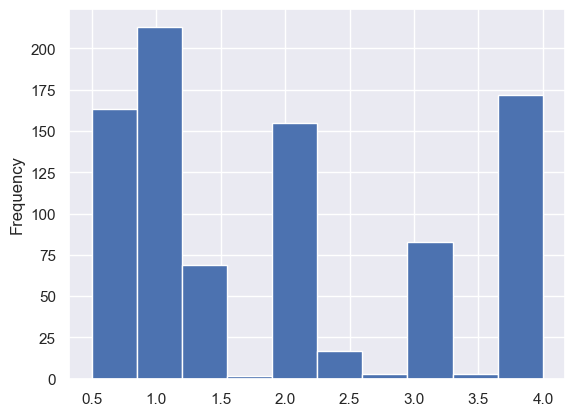

In [32]:
combined[combined['treatment'] == 1]['area_acre'].plot.hist()
plt.savefig("Data/Final/area_acre.png")
plt.show()